# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [10]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import citipy

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [14]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

605

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [15]:
# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key 

# List of city data
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out the max temp, humidity, and cloudiness
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
        
        

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | kavieng
Processing Record 2 of Set 1 | port elizabeth
Processing Record 3 of Set 1 | saskylakh
Processing Record 4 of Set 1 | puerto ayora
Processing Record 5 of Set 1 | staraya russa
Processing Record 6 of Set 1 | rikitea
Processing Record 7 of Set 1 | asau
City not found. Skipping...
Processing Record 8 of Set 1 | lambarene
Processing Record 9 of Set 1 | castro
Processing Record 10 of Set 1 | banda aceh
Processing Record 11 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 12 of Set 1 | dolores
Processing Record 13 of Set 1 | katha
City not found. Skipping...
Processing Record 14 of Set 1 | coquimbo
Processing Record 15 of Set 1 | hasaki
Processing Record 16 of Set 1 | zanjan
Processing Record 17 of Set 1 | qaanaaq
Processing Record 18 of Set 1 | hermanus
Processing Record 19 of Set 1 | hofn
Processing Record 20 of Set 1 | isangel
Processing Record 21 of Set 1 | taolanar

Processing Record 35 of Set 4 | kadaya
Processing Record 36 of Set 4 | beringovskiy
Processing Record 37 of Set 4 | bluff
Processing Record 38 of Set 4 | wanaka
Processing Record 39 of Set 4 | tiznit
Processing Record 40 of Set 4 | avarua
Processing Record 41 of Set 4 | charleston
Processing Record 42 of Set 4 | san patricio
Processing Record 43 of Set 4 | odweyne
City not found. Skipping...
Processing Record 44 of Set 4 | vanimo
Processing Record 45 of Set 4 | cidreira
Processing Record 46 of Set 4 | kandrian
Processing Record 47 of Set 4 | sayansk
Processing Record 48 of Set 4 | sao filipe
Processing Record 49 of Set 4 | san cristobal
Processing Record 0 of Set 5 | tiksi
Processing Record 1 of Set 5 | roma
Processing Record 2 of Set 5 | krasnoarmeyskiy
Processing Record 3 of Set 5 | coahuayana
Processing Record 4 of Set 5 | mitchelstown
Processing Record 5 of Set 5 | pandan niog
Processing Record 6 of Set 5 | burns lake
Processing Record 7 of Set 5 | akureyri
Processing Record 8 of S

Processing Record 21 of Set 8 | grande prairie
Processing Record 22 of Set 8 | copacele
Processing Record 23 of Set 8 | goderich
Processing Record 24 of Set 8 | vicuna
City not found. Skipping...
Processing Record 25 of Set 8 | imperia
Processing Record 26 of Set 8 | troitskoye
Processing Record 27 of Set 8 | jinchang
Processing Record 28 of Set 8 | cortes
Processing Record 29 of Set 8 | maldonado
Processing Record 30 of Set 8 | lorengau
Processing Record 31 of Set 8 | college
Processing Record 32 of Set 8 | namatanai
Processing Record 33 of Set 8 | hackettstown
Processing Record 34 of Set 8 | te anau
Processing Record 35 of Set 8 | kangavar
Processing Record 36 of Set 8 | harper
Processing Record 37 of Set 8 | ribeira grande
Processing Record 38 of Set 8 | halifax
Processing Record 39 of Set 8 | ketchikan
Processing Record 40 of Set 8 | lillooet
Processing Record 41 of Set 8 | pyinmana
Processing Record 42 of Set 8 | fort saint john
City not found. Skipping...
Processing Record 43 of 

Processing Record 5 of Set 12 | usinsk
Processing Record 6 of Set 12 | saint-paul
Processing Record 7 of Set 12 | contamana
Processing Record 8 of Set 12 | kingman
Processing Record 9 of Set 12 | parthenay
Processing Record 10 of Set 12 | merauke
Processing Record 11 of Set 12 | saint-pierre
Processing Record 12 of Set 12 | bafoulabe
Processing Record 13 of Set 12 | hede
Processing Record 14 of Set 12 | zyryanka
Processing Record 15 of Set 12 | nyanguge
Processing Record 16 of Set 12 | nabire
Processing Record 17 of Set 12 | attawapiskat
City not found. Skipping...
Processing Record 18 of Set 12 | bertoua
Processing Record 19 of Set 12 | basco
Processing Record 20 of Set 12 | yenagoa
Processing Record 21 of Set 12 | geraldton
Processing Record 22 of Set 12 | shenzhen
Processing Record 23 of Set 12 | tamale
Processing Record 24 of Set 12 | arlit
Processing Record 25 of Set 12 | bichena
Processing Record 26 of Set 12 | marzuq
Processing Record 27 of Set 12 | kaputa
Processing Record 28 o

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [25]:
# Convert array of JSONs into Pandas DataFrame
city_data_pd = pd.DataFrame(city_data)

city_data_pd.head
# Extract relevant fields from the data frame
lats = city_data_pd["Lat"]
max_temps = city_data_pd["Max Temp"]
humidity = city_data_pd["Humidity"]
cloudiness = city_data_pd["Cloudiness"]
wind_speed = city_data_pd["Wind Speed"]

# Export the City_Data into a csv
#city_data_pd.to_csv(output_data_file)

# Show Record Count
city_data_pd.count()



City          543
Cloudiness    543
Country       543
Date          543
Humidity      543
Lat           543
Lng           543
Max Temp      543
Wind Speed    543
dtype: int64

In [26]:
# Display the City Data Frame
city_data_pd.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,kavieng,32,PG,1578287782,69,-2.57,150.80,85.96,9.53
1,port elizabeth,75,US,1578287782,76,39.31,-74.98,37.00,4.70
2,saskylakh,100,RU,1578287782,93,71.97,114.09,-15.48,13.56
3,puerto ayora,3,EC,1578287783,82,-0.74,-90.35,75.99,5.01
4,staraya russa,100,RU,1578287783,70,57.99,31.36,28.76,8.21


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

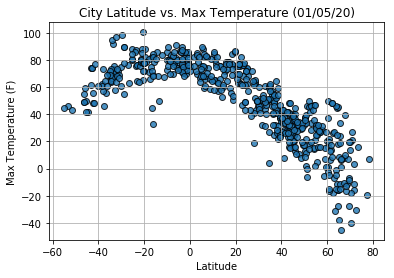

In [33]:
# Build scatter plot for latitude vs. temperature
plt.scatter(lats, 
            max_temps,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude vs. Humidity Plot

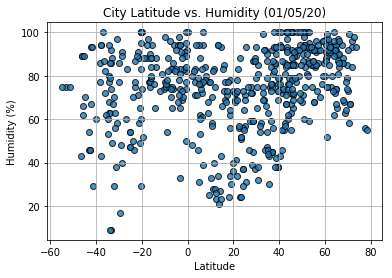

In [34]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(lats, 
            humidity,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude vs. Cloudiness Plot

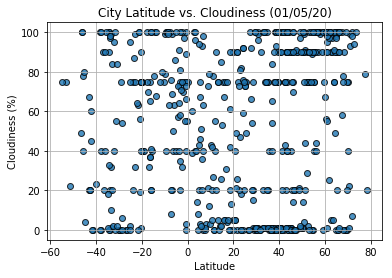

In [35]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(lats, 
            cloudiness,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

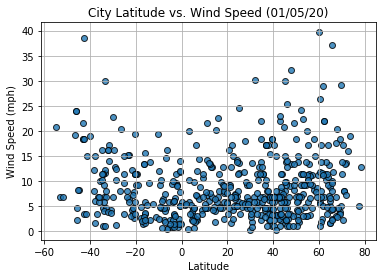

In [36]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(lats, 
            wind_speed,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()